In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pickle

In [4]:
import vdetect

In [5]:
test_images = [mpimg.imread(f) for f in glob('test_images/*.jpg')]

main_region = vdetect.define_main_region_custom()
mr_x0, mr_y0, mr_x1, mr_y1 = main_region

In [6]:
def load_pickle(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [7]:
TIMESTAMP = '2018-04-15_113152'

hyperparams = {
    'hog_n_orient': 9,
    'hog_cell_sz': 8,
    'hog_block_sz': 2,
    'binning_sz': 32,
    'hist_bins': 32
}

classifiers_file = 'serialize/{0}/classifiers_{0}.p'.format(TIMESTAMP)
scaler_file = 'serialize/{0}/scaler_{0}.p'.format(TIMESTAMP)

scaler = load_pickle(scaler_file)
classifiers = load_pickle(classifiers_file)

extract = vdetect.create_feature_extractor(scaler, hyperparams)

In [8]:
classifiers

{'decision_tree_bigger_split': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=5,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'decision_tree_default': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'grad_boost_default': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impuri

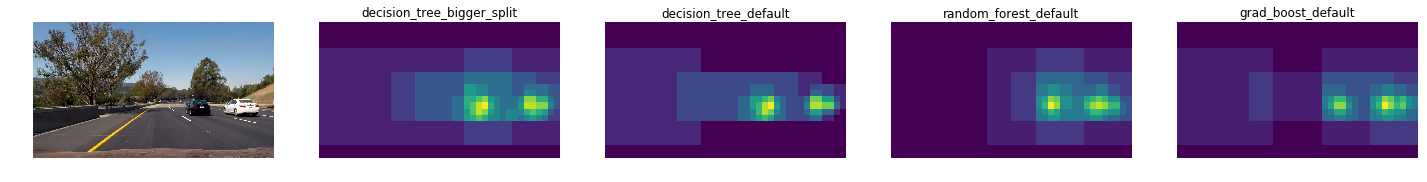

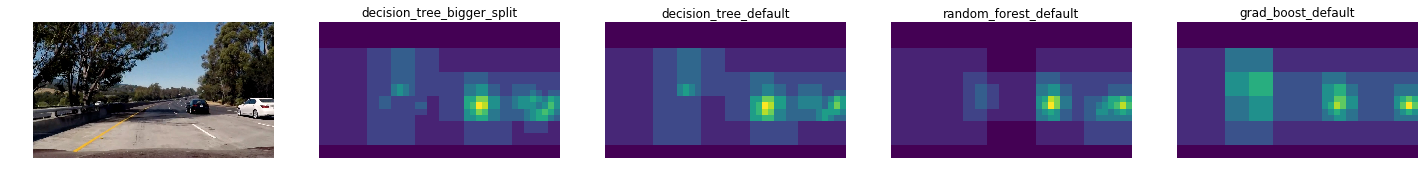

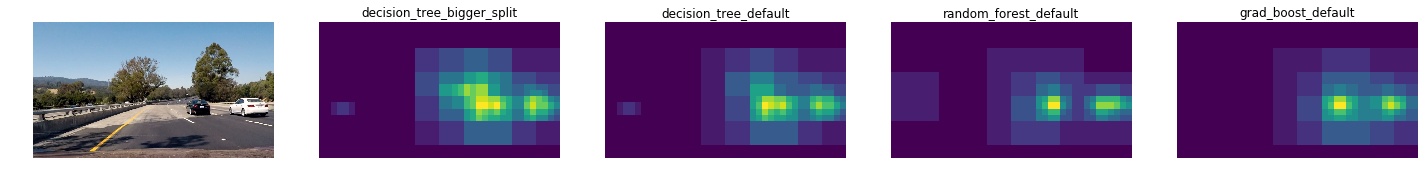

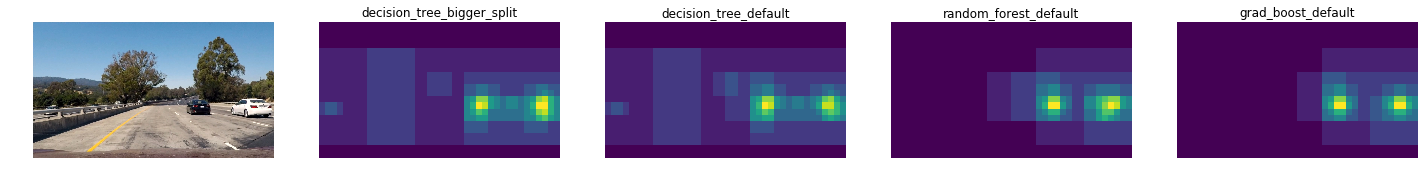

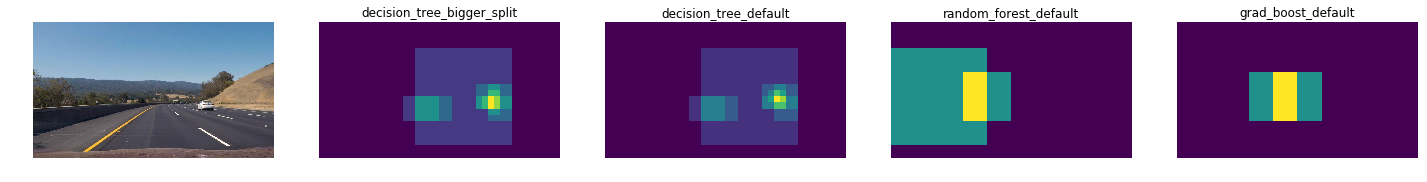

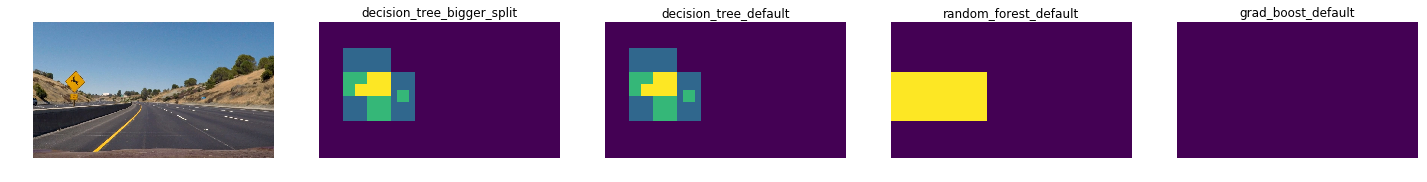

In [9]:
n_cols = len(classifiers) + 1

for im in test_images:

    plt.figure(figsize=(20, 5))
    
    plt.subplot(1, n_cols, 1)
    plt.imshow(im)
    plt.axis('off')
    
    idx = 2
    for k, clf in classifiers.items():
        
        swres = vdetect.sliding_window(im, extract, [classifiers[k]])
        
        plt.subplot(1, n_cols, idx)
        plt.imshow(swres)
        plt.axis('off')
        plt.title(k)
        
        idx += 1
    
    plt.tight_layout()
    

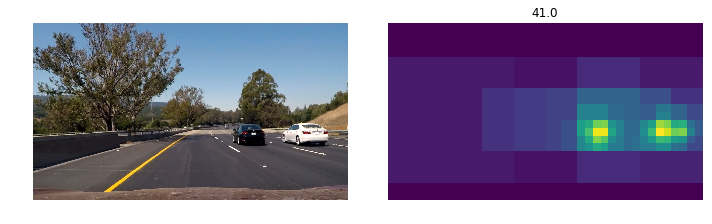

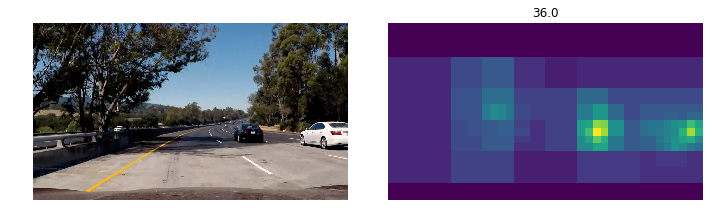

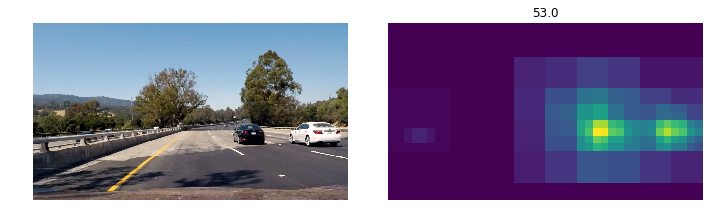

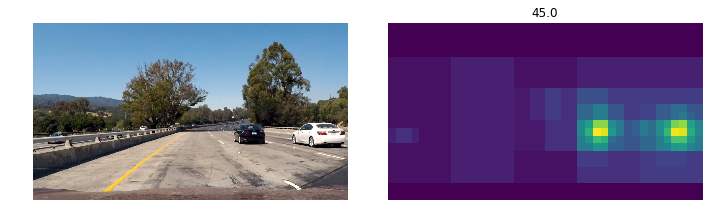

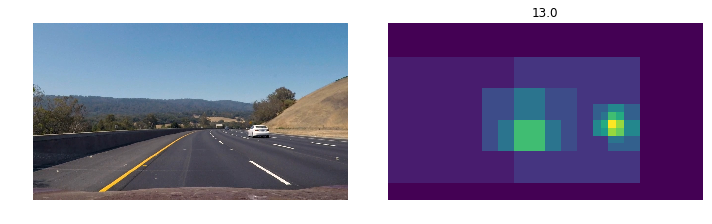

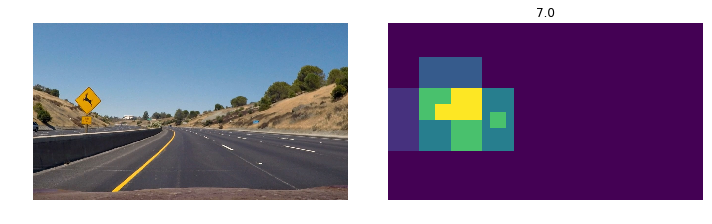

In [10]:

for im in test_images:
    
    selected_clf = [
        classifiers['decision_tree_default'],
        classifiers['decision_tree_bigger_split'],
        classifiers['random_forest_default'],
        classifiers['grad_boost_default']
    ]

    swres = vdetect.sliding_window(im, extract, selected_clf)

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(im)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(swres)
    plt.axis('off')
    plt.title(np.max(swres))
    
    plt.tight_layout()
    